In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import string
import spacy

np.random.seed(42)

In [ ]:
df = pd.read_csv('./dataset/youtoxic_english_1000.csv')
print(df.shape)
print(df.columns)
# df.head(5)
# df["IsToxic"].value_counts()
# df.describe
# df.info()

df["IsToxic"] = df["IsToxic"].apply(lambda x: 1 if x==False else 0).astype("int")
df["IsToxic"]

(1000, 15)
Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')


,IsToxic
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


## Spacy -- for nlp -- for tokenizer

### Tokenizer

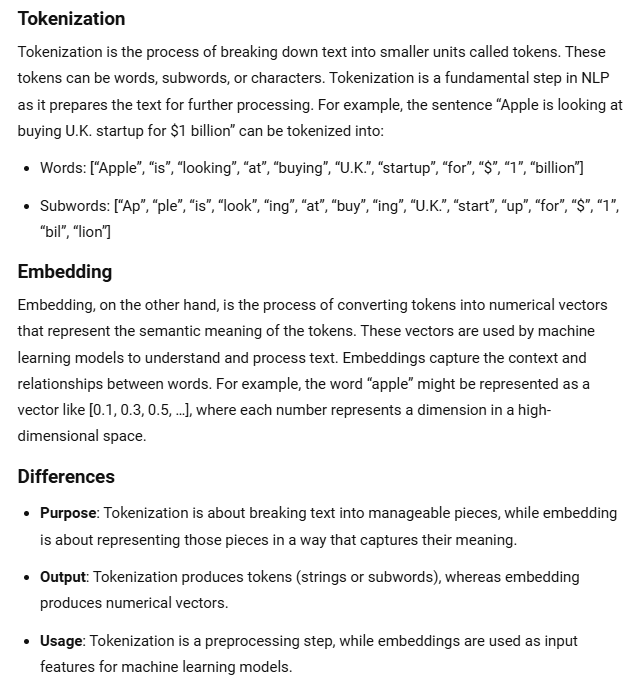


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") # use spacy.load() to load the model

# Get the default set of stop words from spaCy -- reduce fetures dimension,noise,improve model performance
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'other', 'only', 'have', 'anyone', 'whom', 'to', 'until', '‘m', 'take', 'by', "'ll", 'alone', 'something', '’ve', 'he', 'us', 'has', 'perhaps', 'beforehand', 'using', 'give', 'then', 'myself', 'nor', 'whereupon', 'meanwhile', 'various', 'whereby', 'five', 'behind', 'become', 'was', 'somewhere', 'them', '’m', 'up', 'otherwise', 'bottom', 'themselves', 'from', 'for', 'forty', 'via', 'even', 'everyone', 'down', 'nobody', 'a', 'fifteen', 'cannot', 'well', 'say', 'mostly', 'anyhow', 'through', 'might', 'almost', 'much', 'nevertheless', 'at', 'enough', 'should', 'how', 'elsewhere', 'anywhere', 'in', 'out', 'further', 'under', 'formerly', 'after', 'though', 'thereafter', 'full', 'above', 'again', 'fifty', 'when', 'thus', 'sixty', 'on', 'either', 'yet', 'someone', 'also', 'here', 'yourselves', 'somehow', 'eight', 'nowhere', 'over', 'that', 'be', 'yours', 'around', '’d', 'empty', 'go', 'always', 'are', 'itself', 'their', 'below', '‘s', 'made', 'seem', 'ourselves', '‘re', 'beyond', 'whose', 'di

In [ ]:
punctuation = string.punctuation # helpful for reducing & analyze punctuation,okenization: Punctuation marks can be used as delimiters for splitting text into tokens (individual words or units of meaning)
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


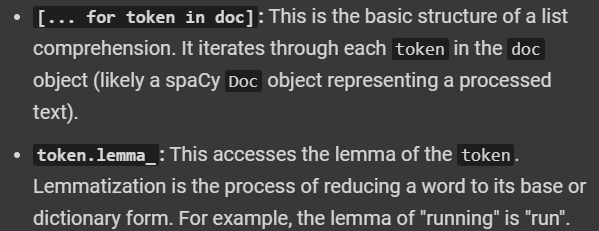

<hr />


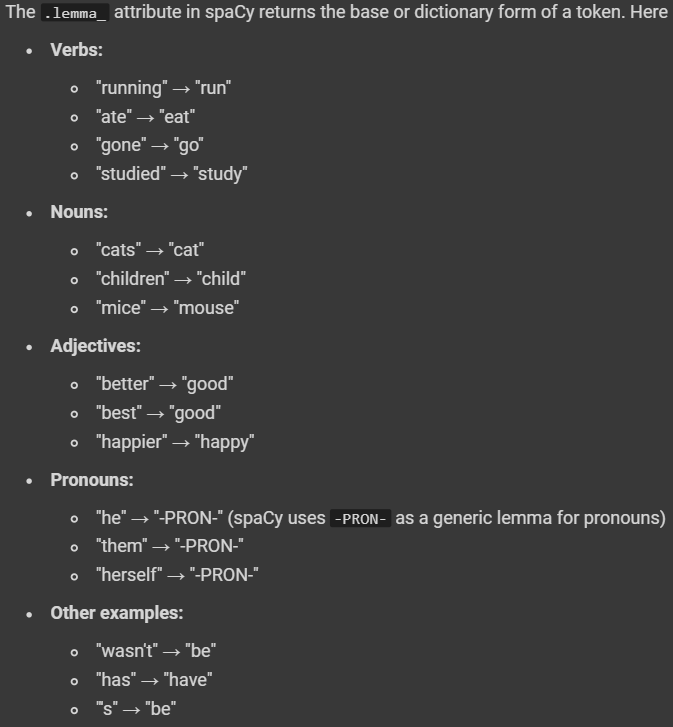


In [ ]:
def spacy_tokenizer(sentence):
  """
  Tokenizes a sentence using spaCy and performs lemmatization, lowercasing, and stop word removal.

  Args:
    sentence: The input sentence to be tokenized.

  Returns:
    A list of tokens after processing.
  """
  doc = nlp(sentence) # Process the sentence with spaCy
  print(doc)
  tokens = [token.lemma_.lower().strip() for token in doc] # Lemmatize, lowercase, and strip each token
  print(tokens)
  mytokens = [token for token in tokens if token not in stop_words and token not in punctuation] # Remove stop words and punctuation
  return mytokens


In [ ]:
sentence = "Hi i am working for Apple.I won't leave the company even if i get offer in other company." # Removed the trailing comma
spacy_tokenizer(sentence)

Hi i am working for Apple.I won't leave the company even if i get offer in other company.
['hi', 'i', 'be', 'work', 'for', 'apple', '.', 'i', 'will', 'not', 'leave', 'the', 'company', 'even', 'if', 'i', 'get', 'offer', 'in', 'other', 'company', '.']


['hi', 'work', 'apple', 'leave', 'company', 'offer', 'company']

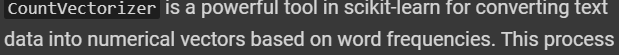

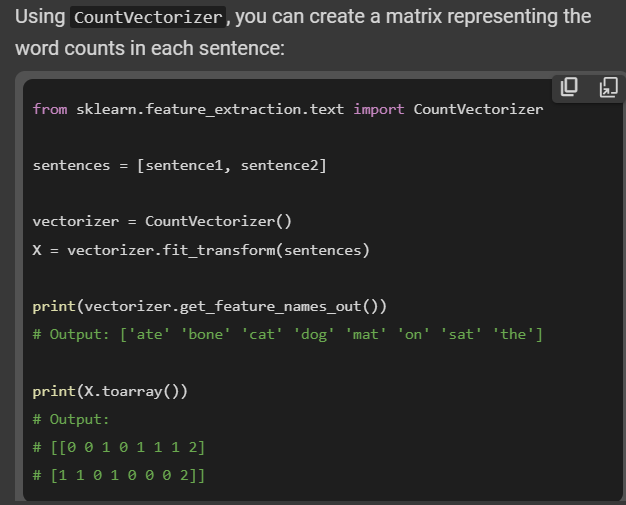


In [ ]:
# Initialize CountVectorizer with the custom spacy_tokenizer
count_vector = CountVectorizer(tokenizer=spacy_tokenizer)

# Initialize TfidfVectorizer with the custom spacy_tokenizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)

# Fit and transform the sample sentences using CountVectorizer and convert the result to an array
print(count_vector.fit_transform(["The above exception","Your name is suman"]).toarray())

# Get the feature names (vocabulary) extracted by CountVectorizer
print(count_vector.get_feature_names_out())

print(count_vector.vocabulary_)

the above exception
['the', 'above', 'exception']
your name is suman
['your', 'name', 'be', 'suman']
[[1 0]
 [0 1]]
['exception' 'suman']
{'exception': 0, 'suman': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:

from sklearn.model_selection import train_test_split

X = df["Text"]
y = df["IsToxic"].astype("int")

# X: Features (e.g., text data, numerical data)
# y: Target variable (e.g., labels, classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# X_train, X_test: Training and testing features
# y_train, y_test: Training and testing target variables
# test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%)
# random_state: Seed for random number generator to ensure reproducibility



## Logistics Regression(with CountVectorize)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model  -- work with numerical data
logreg = LogisticRegression()


# converting the data(text) into matrix
X_train_vectors = count_vector.fit_transform(X_train)
X_test_vectors = count_vector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


https://youtu.be/qlpgdyvx-dm
really black people are the most violent?
['https://youtu.be/qlpgdyvx-dm', '', 'really', 'black', 'people', 'be', 'the', 'most', 'violent', '?']
run'em over, they're on a freaking freeway
["run'em", 'over', ',', 'they', 'be', 'on', 'a', 'freaking', 'freeway']
nothing more hypocritical than a movement claiming to support blacks by blocking probably hundreds of blacks trying to get to their job to feed their god damn family
['nothing', 'more', 'hypocritical', 'than', 'a', 'movement', 'claim', 'to', 'support', 'black', 'by', 'block', 'probably', 'hundred', 'of', 'black', 'try', 'to', 'get', 'to', 'their', 'job', 'to', 'feed', 'their', 'god', 'damn', 'family']
i have told some people on facebook to hold off judgment till the all the facts are in. i just like waiting and seeing all the facts. part of me wants to believe mr. brown is a gentle giant but there a lot of evidence he not.
['i', 'have', 'tell', 'some', 'people', 'on', 'facebook', 'to', 'hold', 'off', '

In [ ]:
print(X_train_vectors.shape)
print(X_test_vectors.shape)


(800, 3105)
(200, 3105)


In [ ]:
# Fit the model on the training data
logreg.fit(X_train_vectors , y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_vectors)

In [ ]:
print("Logistic Regression Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Precision: ",metrics.precision_score(y_test, y_pred))
print("Logistic Regression Recall: ",metrics.recall_score(y_test, y_pred))

Logistic Regression Accuracy:  0.725
Logistic Regression Precision:  0.6992481203007519
Logistic Regression Recall:  0.8611111111111112


## Logistics Regression(with [TF-IDF](https://www.youtube.com/watch?v=0zaXiqzmr7w))

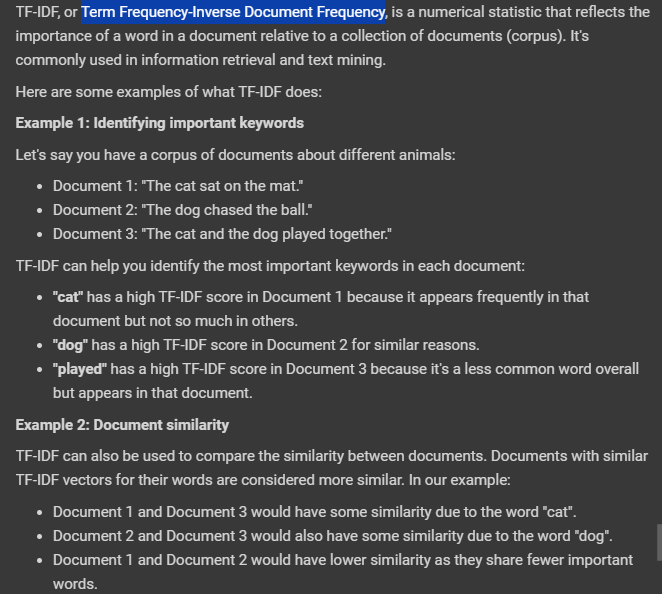


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize TfidfVectorizer with the custom spacy_tokenizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)

# Initialize the Logistic Regression model  -- work with numerical data
logreg2 = LogisticRegression()


# converting the data(text) into matrix
X_train_vectors2 = tfidf_vector.fit_transform(X_train)
X_test_vectors2 = tfidf_vector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


https://youtu.be/qlpgdyvx-dm
really black people are the most violent?
['https://youtu.be/qlpgdyvx-dm', '', 'really', 'black', 'people', 'be', 'the', 'most', 'violent', '?']
run'em over, they're on a freaking freeway
["run'em", 'over', ',', 'they', 'be', 'on', 'a', 'freaking', 'freeway']
nothing more hypocritical than a movement claiming to support blacks by blocking probably hundreds of blacks trying to get to their job to feed their god damn family
['nothing', 'more', 'hypocritical', 'than', 'a', 'movement', 'claim', 'to', 'support', 'black', 'by', 'block', 'probably', 'hundred', 'of', 'black', 'try', 'to', 'get', 'to', 'their', 'job', 'to', 'feed', 'their', 'god', 'damn', 'family']
i have told some people on facebook to hold off judgment till the all the facts are in. i just like waiting and seeing all the facts. part of me wants to believe mr. brown is a gentle giant but there a lot of evidence he not.
['i', 'have', 'tell', 'some', 'people', 'on', 'facebook', 'to', 'hold', 'off', '

In [ ]:
# prompt: shape of x_train and x_test vector

print(X_train_vectors2.shape)
print(X_test_vectors2.shape)


(800, 3105)
(200, 3105)


In [ ]:
# Fit the model on the training data
logreg2.fit(X_train_vectors2 , y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_vectors2)

In [ ]:
print("Logistic Regression Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Precision: ",metrics.precision_score(y_test, y_pred))
print("Logistic Regression Recall: ",metrics.recall_score(y_test, y_pred))

Logistic Regression Accuracy:  0.645
Logistic Regression Precision:  0.6107784431137725
Logistic Regression Recall:  0.9444444444444444
